# Oscillating droplet verification case


To analyze the accuracy of LENT with interface deformation we adopt the setup of an oscillating droplet given in [14, 17]. For this case, Lamb derived an analytical solution. The oscillation frequency of an inviscid droplet is given by $$\omega^2_n = \frac{n(n+1)(n-1)(n+2)\sigma}{[(n+1)\rho_d+n\rho_a]\mathit{R}^3_0}$$ with the mode number $n$, the droplet density $\rho_d$, the density of the ambient ﬂuid $\rho_a$ and the radius of the unperturbed droplet $\mathit{R}_0$. In case of a viscous ﬂuid, the amplitude $a_n(t)$ decreases over time $$a_n(t)=a_0e^{-\gamma t},\ \gamma = \frac{(n-1)(2n+1)\nu}{\mathit{R}^2_0}.$$ 

The initial interface shape is $$\mathit{R}(\theta,t) = \mathit{R}_0 + \epsilon\mathit{P}_n(\cos\theta)\sin(\omega_nt),\ \ \theta \in [0,2\pi],$$where $\mathit{P}_n$ denotes the $n$-th order Legendre polynom.

The domain is $\omega$ : $[0,0,0]\times[4,4,4]$, the interface is initialized with $\mathit{R}_0 = 1$, $n = 2$, $\epsilon = 0.025$ and $t = \pi/(2\omega_n)$ with its center at $[2.00001,1.99999,2.0000341]$. Material parameters are $\rho_d = 10$, $\rho_a = 0.1$, $\nu_d = [0.05,0.005]$, $\nu_a = 5e-4$ and $\sigma = 10$. Initial ﬁelds at $t = 0 $ are $\mathbf{v}_0 = 0$ and $p_0 = 0$. Dirichlet boundary conditions are used for the pressure $(p = 0)$ and $\nabla\mathbf{v}\bullet n = 0$ for $\mathbf{v}$. The semi-axis length is computed as $$s_x = \frac{\max \limits_{k}\left(\mathbf{x}^k_\Gamma\cdot\mathbf{e}_x\right)-\min \limits_{k}\left(\mathbf{x}^k_\Gamma\cdot\mathbf{e}_x\right)}{2}$$ in each time step.

**SAAMPLE: A Segregated Accuracy-driven Algorithm for Multiphase Pressure-Linked Equations,
Tobias Tolle, Dieter Bothe, Tomislav Maric** __[arXiv](https://arxiv.org/abs/2001.09775v1)__

In [15]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200



def plot_oscillation(df,nu_d,resolutions,name):
    R_0=1
    n=2
    sigma=10
    rho_d = 10
    rho_a = 0.1
    a_0 = 0.025
    w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a))*R_0**3)
    #print(w_n)

    fig, ax = plt.subplots(1,2)
    
    for i,nu in enumerate(nu_d, start=0):
        gamma = (n-1)*(2*n+1)*nu/(R_0**2)
        df_nu = df.loc[df['nu_droplet']==nu]
        max_t = max(df_nu['time'])
        
        for resolution in resolutions:
            s_x = df.loc[(df['nu_droplet']==nu)&(df['resolution']==resolution) ]
            ax[i].plot(s_x['time']* w_n / 20*np.pi,s_x['semi-axes-x'],label = "%s"%resolution)
            ax[i].legend(loc='upper left')
            if max(s_x['time']) == max_t:
                ax[i].plot(s_x['time']* w_n / 20*np.pi, R_0 + a_0*np.exp(-gamma*s_x['time']),'k--')
                ax[i].plot(s_x['time']* w_n / 20*np.pi, R_0 - a_0*np.exp(-gamma*s_x['time']),'k--')
                
        ax[i].set_xlabel("$t^*$")
        ax[i].set_ylabel('$s_x$')
        ax[i].set_xlim(0,2.2)
        ax[i].set_ylim(0.97,1.03)
        ax[i].set_xticks([0,0.5,1,1.5,2])
        ax[i].set_xticklabels(['0','1/2','1','3/2','2'])
        ax[i].set_title(r"$\nu = %s,\ %s$"%(nu,name))
        ax[i].grid(c='gainsboro')
        
    fig.tight_layout()      
    #fig.subplots_adjust(top=0.88)
    plt.show()

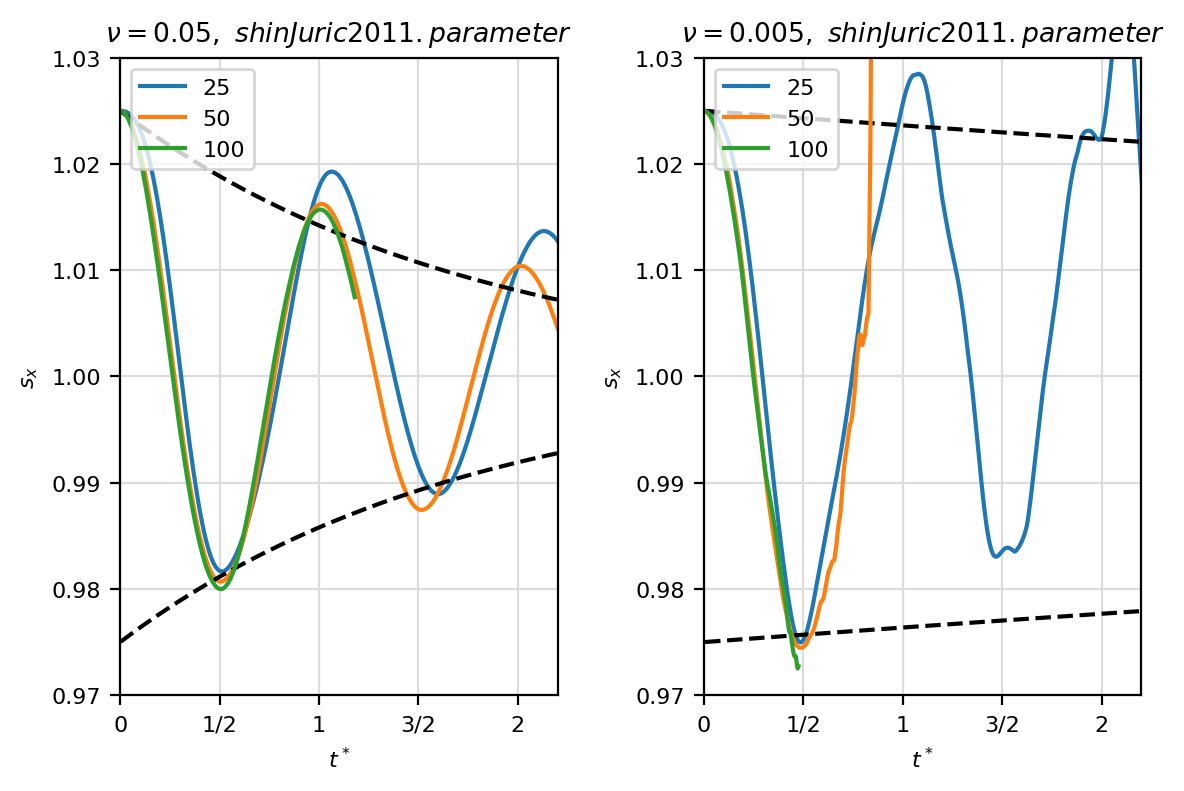

In [16]:
shinJuric_2011_agglom  = datglom.data_agglomerator("shinJuric2011.parameter", 
                                                   "shinJuric2011.parameter_00000_template_copy_block",
                                                   "oscillatingDropletResults.csv") 

shinJuric_2011_df = shinJuric_2011_agglom.study_dataframe() 
df_shinJuric2011=shinJuric_2011_df.reset_index()

nu_d_shinJuric2011=list(set(df_shinJuric2011['nu_droplet']))
resolutions_shinJuric2011=list(set(df_shinJuric2011['resolution']))
plot_oscillation(df_shinJuric2011,nu_d_shinJuric2011,resolutions_shinJuric2011,'shinJuric2011.parameter')